# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 
             'Jack', 'Queen', 'King', 'Ace', 'Plastic'] 

    def __init__(self, rank, suit=None):
        if rank not in self.ranks:
            raise ValueError(f"Invalid rank: {rank}")
        if rank != 'Plastic' and suit not in self.suits:
            raise ValueError(f"Invalid suit: {suit}")

        self.rank = rank
        self.suit = suit 

    def value(self):
        if self.rank == "Plastic":
            return 0 
        elif self.rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self.rank == 'Ace':
            return 11 
        else:
            return int(self.rank)

    def __str__(self):
        return f"{self.rank} of {self.suit}" if self.suit else "Plastic Card"

    def __repr__(self):
        return self.__str__()

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self.create_deck(num_decks)
        self.plastic_card = Card('Plastic')  
        self.shuffle()

    def create_deck(self, num_decks):
        return [Card(rank, suit) for rank in Card.ranks[:-1] 
                for suit in Card.suits] * num_decks

    def shuffle(self):
        random.shuffle(self.cards)
        random_position = random.randint(0, len(self.cards))
        self.cards.insert(random_position, self.plastic_card)

    def draw_card(self):
        if len(self.cards) == 0:
            raise ValueError("No cards left in the deck.")
        return self.cards.pop()

if __name__ == "__main__":
    deck = Deck(num_decks=6) 
    print(f"Initial deck size: {len(deck.cards)}")

    for _ in range(5):
        card = deck.draw_card()
        print(f"Drew: {card}")
        print(f"Remaining deck size: {len(deck.cards)}")
        
    print(f"Plastic card is drawn: {'Plastic' in [card.rank for card in deck.cards]}")


Initial deck size: 313
Drew: Ace of Spades
Remaining deck size: 312
Drew: 7 of Hearts
Remaining deck size: 311
Drew: 6 of Hearts
Remaining deck size: 310
Drew: 5 of Diamonds
Remaining deck size: 309
Drew: Queen of Hearts
Remaining deck size: 308
Plastic card is drawn: True


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [9]:
class Player:
    def __init__(self, name):
        self.name = name
        self.chips = 100  
        self.hand = []

    def add_card(self, card):
        self.hand.append(card)

    def reset_hand(self):
        self.hand = []

    def hand_value(self):
        total = sum(card.value() for card in self.hand)
        aces = sum(1 for card in self.hand if card.rank == 'Ace')
        while total > 21 and aces:
            total -= 10
            aces -= 1

        return total

    def __str__(self):
        return f"{self.name} (Chips: {self.chips}, Hand: {', '.join(map(str, self.hand))})"


class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def show_first_card(self):
        return str(self.hand[0]) if self.hand else "No cards"

    def play(self, deck):
        while self.hand_value() < 17:
            self.add_card(deck.draw_card())

if __name__ == "__main__":
    deck = Deck(6)
    dealer = Dealer()
    player = Player("Alice")

    for _ in range(2): 
        player.add_card(deck.draw_card())
        dealer.add_card(deck.draw_card())

    print(player)
    print(f"Dealer's First Card: {dealer.show_first_card()}")
    
    dealer.play(deck)
    print(f"Dealer's Hand: {', '.join(map(str, dealer.hand))} (Total: {dealer.hand_value()})")


Alice (Chips: 100, Hand: 5 of Diamonds, 6 of Hearts)
Dealer's First Card: 2 of Spades
Dealer's Hand: 2 of Spades, 6 of Spades, Queen of Clubs (Total: 18)


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [3]:
class BlackjackGame:
    def __init__(self, num_rounds=5):
        self.deck = Deck(6)  
        self.dealer = Dealer()
        self.player = Player("Alice")
        self.num_rounds = num_rounds

    def play_round(self):
        self.dealer.reset_hand()
        self.player.reset_hand()

        for _ in range(2):
            self.player.add_card(self.deck.draw_card())
            self.dealer.add_card(self.deck.draw_card())

        print("\n--- New Round ---")
        print(self.player)
        print(f"Dealer's First Card: {self.dealer.show_first_card()}")
        
        while True:
            if self.player.hand_value() > 21:
                print(f"{self.player.name} busts with a total of {self.player.hand_value()}!")
                return

            action = input("Do you want to hit or stand? (h/s): ").strip().lower()
            if action == 'h':
                self.player.add_card(self.deck.draw_card())
                print(self.player)
            elif action == 's':
                break
            else:
                print("Invalid input! Please enter 'h' to hit or 's' to stand.")

        self.dealer.play(self.deck)
        print(f"Dealer's Hand: {', '.join(map(str, self.dealer.hand))} (Total: {self.dealer.hand_value()})")

        player_value = self.player.hand_value()
        dealer_value = self.dealer.hand_value()

        if dealer_value > 21:
            print("Dealer busts! Player wins!")
        elif player_value > dealer_value:
            print("Player wins!")
        elif player_value < dealer_value:
            print("Dealer wins!")
        else:
            print("It's a tie!")

    def play_game(self):
        for round_number in range(1, self.num_rounds + 1):
            print(f"\n--- Round {round_number} ---")
            self.play_round()
            if len(self.deck.cards) < 20:  
                print("Reshuffling the deck...")
                self.deck = Deck(6)

if __name__ == "__main__":
    game = BlackjackGame(num_rounds=5) 
    game.play_game()



--- Round 1 ---

--- New Round ---
Alice (Chips: 100, Hand: 5 of Spades, 4 of Hearts)
Dealer's First Card: 4 of Clubs
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: 5 of Spades, 4 of Hearts, 4 of Clubs)
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: 5 of Spades, 4 of Hearts, 4 of Clubs, Queen of Spades)
Alice busts with a total of 23!

--- Round 2 ---

--- New Round ---
Alice (Chips: 100, Hand: 8 of Clubs, 6 of Clubs)
Dealer's First Card: 5 of Hearts
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: 8 of Clubs, 6 of Clubs, 6 of Hearts)
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: 8 of Clubs, 6 of Clubs, 6 of Hearts, 6 of Hearts)
Alice busts with a total of 26!

--- Round 3 ---

--- New Round ---
Alice (Chips: 100, Hand: 3 of Clubs, 10 of Diamonds)
Dealer's First Card: Queen of Spades
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: 3 of Clubs, 10 of Diamonds, 2 of Spades)
Do you want to hit or stand? (h/s): h

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [4]:
class CardCountingPlayer(Player):
    def __init__(self, name, hit_threshold=-2):
        super().__init__(name)
        self.card_count = 0  
        self.hit_threshold = hit_threshold  

    def assign_card_value(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            return 1  
        elif card.rank in ['7', '8', '9']:
            return 0  
        else:
            return -1  

    def update_card_count(self, card):
        self.card_count += self.assign_card_value(card)

    def decide_action(self):
        if self.card_count <= self.hit_threshold:
            return 'hit'
        else:
            return 'stay'

    def play(self, deck):
        while True:
            action = self.decide_action()
            if action == 'hit':
                new_card = deck.draw_card()
                self.add_card(new_card)
                self.update_card_count(new_card)
                print(f"{self.name} hits: {new_card}. Current count: {self.card_count}. Hand value: {self.hand_value()}")
                
                if self.hand_value() > 21:
                    print(f"{self.name} busts with a total of {self.hand_value()}!")
                    break
            else:
                print(f"{self.name} stands with a hand value of {self.hand_value()}.")
                break


if __name__ == "__main__":
    game = BlackjackGame(num_rounds=1)  
    game.player = CardCountingPlayer("Alice") 
    game.play_game()



--- Round 1 ---

--- New Round ---
Alice (Chips: 100, Hand: Ace of Clubs, King of Hearts)
Dealer's First Card: 5 of Hearts
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: Ace of Clubs, King of Hearts, 6 of Spades)
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: Ace of Clubs, King of Hearts, 6 of Spades, 3 of Hearts)
Do you want to hit or stand? (h/s): h
Alice (Chips: 100, Hand: Ace of Clubs, King of Hearts, 6 of Spades, 3 of Hearts, 3 of Hearts)
Alice busts with a total of 23!


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [5]:
class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play(self, deck):
        while self.hand_value() < 17:
            self.add_card(deck.draw_card())

class QuietBlackjackGame(BlackjackGame):
    def __init__(self, num_rounds=50, initial_chips=1000):
        super().__init__(num_rounds)
        self.strategy_player = CardCountingPlayer("Strategy Player")
        self.dealer = Dealer()
        self.other_players = [Player(f"Player {i + 1}") for i in range(3)]
        self.chips = initial_chips 
        self.strategy_player.chips = self.chips
        for player in self.other_players:
            player.chips = self.chips

    def play_round(self):
        self.deck = Deck(6)  
        self.dealer.reset_hand()
        self.strategy_player.reset_hand()

        for _ in range(2):
            self.strategy_player.add_card(self.deck.draw_card())
            self.dealer.add_card(self.deck.draw_card())
            for player in self.other_players:
                player.add_card(self.deck.draw_card())

        self.strategy_player.play(self.deck)

        self.dealer.play(self.deck)

        dealer_value = self.dealer.hand_value()
        for player in self.other_players:
            player_value = player.hand_value()
            if player_value > 21:
                player.chips -= 100  
            elif dealer_value > 21 or player_value > dealer_value:
                player.chips += 100 
            else:
                player.chips -= 100

        strategy_value = self.strategy_player.hand_value()
        if strategy_value > 21:
            self.strategy_player.chips -= 100  
        elif dealer_value > 21 or strategy_value > dealer_value:
            self.strategy_player.chips += 100  
        else:
            self.strategy_player.chips -= 100  

    def play_game(self):
        for round_number in range(1, self.num_rounds + 1):
            if self.strategy_player.chips <= 0:
                print("Strategy player is out of chips!")
                break
            print(f"\n--- Round {round_number} ---")
            self.play_round()

        print(f"Final chips for Strategy Player: {self.strategy_player.chips}")

if __name__ == "__main__":
    game = QuietBlackjackGame(num_rounds=50, initial_chips=1000)
    game.play_game()



--- Round 1 ---
Strategy Player stands with a hand value of 21.

--- Round 2 ---
Strategy Player stands with a hand value of 19.

--- Round 3 ---
Strategy Player stands with a hand value of 20.

--- Round 4 ---
Strategy Player stands with a hand value of 13.

--- Round 5 ---
Strategy Player stands with a hand value of 19.

--- Round 6 ---
Strategy Player stands with a hand value of 15.

--- Round 7 ---
Strategy Player stands with a hand value of 15.

--- Round 8 ---
Strategy Player stands with a hand value of 15.

--- Round 9 ---
Strategy Player stands with a hand value of 13.

--- Round 10 ---
Strategy Player stands with a hand value of 5.

--- Round 11 ---
Strategy Player stands with a hand value of 12.

--- Round 12 ---
Strategy Player stands with a hand value of 13.

--- Round 13 ---
Strategy Player stands with a hand value of 16.

--- Round 14 ---
Strategy Player stands with a hand value of 8.

--- Round 15 ---
Strategy Player stands with a hand value of 11.

--- Round 16 ---
Str

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?



--- Round 1 ---
Strategy Player stands with a hand value of 7.

--- Round 2 ---
Strategy Player stands with a hand value of 9.

--- Round 3 ---
Strategy Player stands with a hand value of 6.

--- Round 4 ---
Strategy Player stands with a hand value of 13.

--- Round 5 ---
Strategy Player stands with a hand value of 20.

--- Round 6 ---
Strategy Player stands with a hand value of 14.

--- Round 7 ---
Strategy Player stands with a hand value of 19.

--- Round 8 ---
Strategy Player stands with a hand value of 16.

--- Round 9 ---
Strategy Player stands with a hand value of 15.

--- Round 10 ---
Strategy Player stands with a hand value of 12.

--- Round 11 ---
Strategy Player stands with a hand value of 20.

--- Round 12 ---
Strategy Player stands with a hand value of 16.

--- Round 13 ---
Strategy Player stands with a hand value of 13.

--- Round 14 ---
Strategy Player stands with a hand value of 13.

--- Round 15 ---
Strategy Player stands with a hand value of 15.

--- Round 16 ---
Stra


--- Round 25 ---
Strategy Player stands with a hand value of 19.

--- Round 26 ---
Strategy Player stands with a hand value of 18.

--- Round 27 ---
Strategy Player stands with a hand value of 20.

--- Round 28 ---
Strategy Player stands with a hand value of 19.

--- Round 29 ---
Strategy Player stands with a hand value of 14.

--- Round 30 ---
Strategy Player stands with a hand value of 13.

--- Round 31 ---
Strategy Player stands with a hand value of 19.

--- Round 32 ---
Strategy Player stands with a hand value of 18.

--- Round 33 ---
Strategy Player stands with a hand value of 17.

--- Round 34 ---
Strategy Player stands with a hand value of 16.

--- Round 35 ---
Strategy Player stands with a hand value of 16.

--- Round 36 ---
Strategy Player stands with a hand value of 16.

--- Round 37 ---
Strategy Player stands with a hand value of 16.

--- Round 38 ---
Strategy Player stands with a hand value of 16.

--- Round 39 ---
Strategy Player stands with a hand value of 15.

--- Round

Strategy Player stands with a hand value of 20.

--- Round 37 ---
Strategy Player stands with a hand value of 20.

--- Round 38 ---
Strategy Player stands with a hand value of 20.

--- Round 39 ---
Strategy Player stands with a hand value of 16.

--- Round 40 ---
Strategy Player stands with a hand value of 14.

--- Round 41 ---
Strategy Player stands with a hand value of 18.

--- Round 42 ---
Strategy Player stands with a hand value of 14.

--- Round 43 ---
Strategy Player stands with a hand value of 15.

--- Round 44 ---
Strategy Player stands with a hand value of 19.

--- Round 45 ---
Strategy Player stands with a hand value of 13.

--- Round 46 ---
Strategy Player stands with a hand value of 12.

--- Round 47 ---
Strategy Player stands with a hand value of 6.

--- Round 48 ---
Strategy Player stands with a hand value of 12.

--- Round 49 ---
Strategy Player stands with a hand value of 13.

--- Round 50 ---
Strategy Player stands with a hand value of 21.
Final chips for Strategy Play

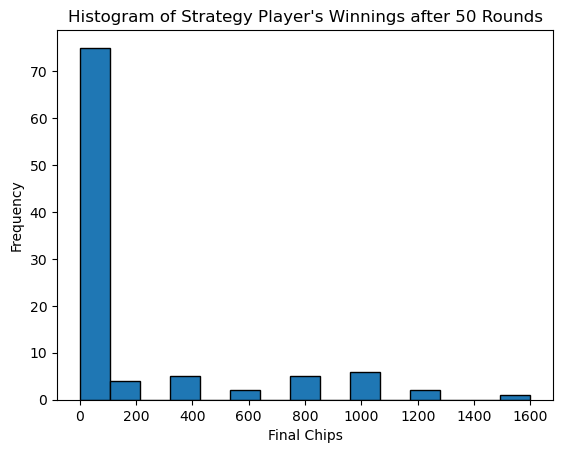

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulations(num_games, num_rounds, initial_chips):
    winnings = []
    for _ in range(num_games):
        game = QuietBlackjackGame(num_rounds=num_rounds, initial_chips=initial_chips)
        game.play_game()
        winnings.append(game.strategy_player.chips)
    return winnings

num_games = 100
num_rounds = 50
initial_chips = 1000

winnings = run_simulations(num_games, num_rounds, initial_chips)

average_winnings = np.mean(winnings) - initial_chips
std_deviation = np.std(winnings)
net_wins = sum(1 for win in winnings if win > initial_chips)
probability_net_win = net_wins / num_games
probability_net_loss = 1 - probability_net_win

print(f"Average winnings per round: {average_winnings / num_rounds:.2f}")
print(f"Standard deviation of winnings: {std_deviation:.2f}")
print(f"Probability of net winning after 50 rounds: {probability_net_win:.2%}")
print(f"Probability of net losing after 50 rounds: {probability_net_loss:.2%}")

plt.hist(winnings, bins=15, edgecolor='black')
plt.title("Histogram of Strategy Player's Winnings after 50 Rounds")
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.show()

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Threshold 10: Avg Winnings = -818.00, Std Dev = 323.85, Win Probability = 2.00%
Threshold 12: Avg Winnings = -700.00, Std Dev = 476.24, Win Probability = 8.00%
Threshold 14: Avg Winnings = -726.00, Std Dev = 471.30, Win Probability = 9.00%
Threshold 16: Avg Winnings = -652.00, Std Dev = 454.86, Win Probability = 9.00%
Threshold 18: Avg Winnings = -762.00, Std Dev = 406.64, Win Probability = 3.00%

Optimal Threshold: 16
Optimal Average Winnings: -652.00
Optimal Standard Deviation: 454.86
Optimal Win Probability: 9.00%


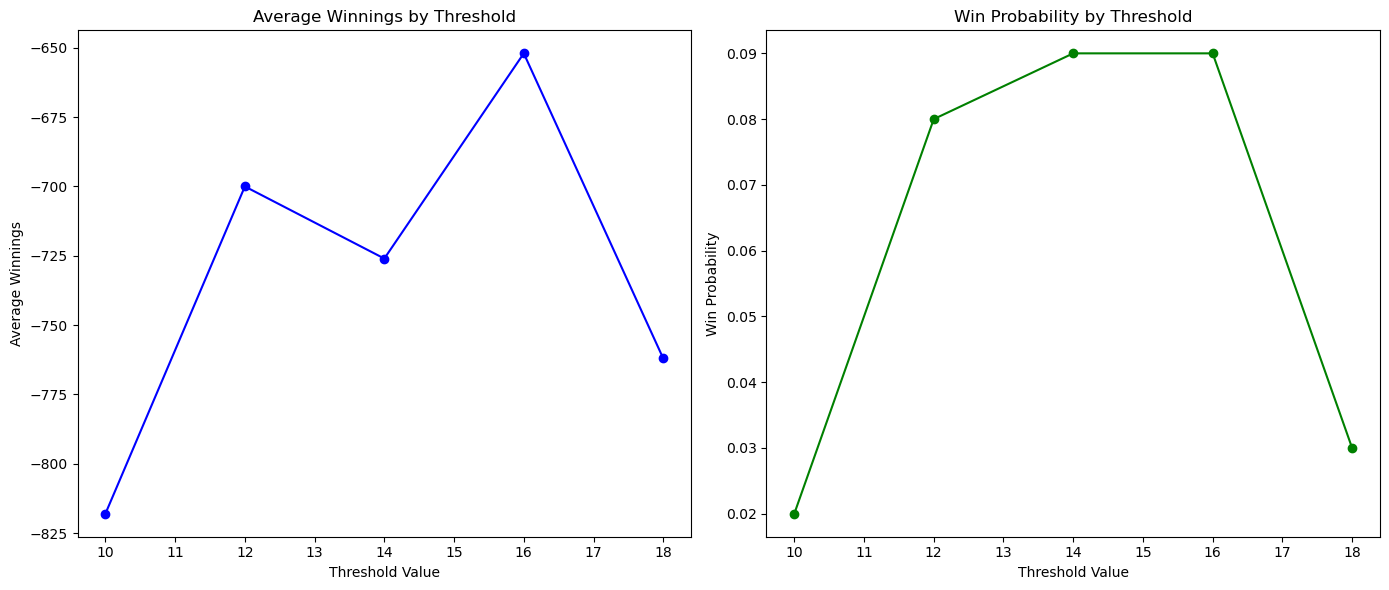

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=14):
        super().__init__(name)
        self.threshold = threshold

    def play(self, deck):
        while self.hand_value() < self.threshold:
            self.add_card(deck.draw_card())

class QuietBlackjackGame(BlackjackGame):
    def __init__(self, num_rounds=50, initial_chips=1000, threshold=14):
        super().__init__(num_rounds)
        self.strategy_player = CardCountingPlayer("Strategy Player", threshold=threshold)
        self.dealer = Dealer()
        self.other_players = [Player(f"Player {i + 1}") for i in range(3)]
        self.strategy_player.chips = initial_chips
        for player in self.other_players:
            player.chips = initial_chips

    def play_round(self):
        self.deck = Deck(6)
        self.dealer.reset_hand()
        self.strategy_player.reset_hand()
        for player in self.other_players:
            player.reset_hand()

        for _ in range(2):
            self.strategy_player.add_card(self.deck.draw_card())
            self.dealer.add_card(self.deck.draw_card())
            for player in self.other_players:
                player.add_card(self.deck.draw_card())

        self.strategy_player.play(self.deck)
        self.dealer.play(self.deck)

        dealer_value = self.dealer.hand_value()
        for player in self.other_players:
            player_value = player.hand_value()
            if player_value > 21:
                player.chips -= 100
            elif dealer_value > 21 or player_value > dealer_value:
                player.chips += 100
            else:
                player.chips -= 100

        strategy_value = self.strategy_player.hand_value()
        if strategy_value > 21:
            self.strategy_player.chips -= 100
        elif dealer_value > 21 or strategy_value > dealer_value:
            self.strategy_player.chips += 100
        else:
            self.strategy_player.chips -= 100

    def play_game(self):
        for round_number in range(1, self.num_rounds + 1):
            if self.strategy_player.chips <= 0:
                break
            self.play_round()
        return self.strategy_player.chips

# Function to run simulations for different threshold values
def run_threshold_simulations(threshold_values, num_games, num_rounds, initial_chips):
    results = {}
    for threshold in threshold_values:
        winnings = []
        for _ in range(num_games):
            game = QuietBlackjackGame(num_rounds=num_rounds, initial_chips=initial_chips, threshold=threshold)
            final_chips = game.play_game()
            winnings.append(final_chips)
        avg_winnings = np.mean(winnings) - initial_chips
        std_deviation = np.std(winnings)
        win_prob = sum(1 for w in winnings if w > initial_chips) / len(winnings)
        results[threshold] = (avg_winnings, std_deviation, win_prob)
        print(f"Threshold {threshold}: Avg Winnings = {avg_winnings:.2f}, Std Dev = {std_deviation:.2f}, Win Probability = {win_prob:.2%}")
    return results

num_games = 100
num_rounds = 50
initial_chips = 1000
threshold_values = [10, 12, 14, 16, 18]

results = run_threshold_simulations(threshold_values, num_games, num_rounds, initial_chips)

optimal_threshold = max(results, key=lambda x: results[x][0])
optimal_avg_winnings = results[optimal_threshold][0]
optimal_std_dev = results[optimal_threshold][1]
optimal_win_prob = results[optimal_threshold][2]

print(f"\nOptimal Threshold: {optimal_threshold}")
print(f"Optimal Average Winnings: {optimal_avg_winnings:.2f}")
print(f"Optimal Standard Deviation: {optimal_std_dev:.2f}")
print(f"Optimal Win Probability: {optimal_win_prob:.2%}")

thresholds, avg_winnings, std_devs, win_probs = zip(*[(th, *results[th]) for th in threshold_values])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(thresholds, avg_winnings, marker='o', color='b')
plt.xlabel("Threshold Value")
plt.ylabel("Average Winnings")
plt.title("Average Winnings by Threshold")

plt.subplot(1, 2, 2)
plt.plot(thresholds, win_probs, marker='o', color='green')
plt.xlabel("Threshold Value")
plt.ylabel("Win Probability")
plt.title("Win Probability by Threshold")

plt.tight_layout()
plt.show()


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

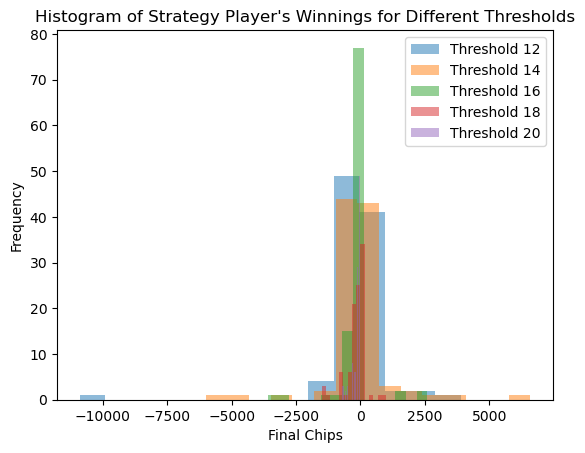


Threshold 12 Results:
Average winnings per round: -22.92
Standard deviation of winnings: 1264.87
Probability of net winning after 50 rounds: 4.00%

Threshold 14 Results:
Average winnings per round: -22.30
Standard deviation of winnings: 1211.89
Probability of net winning after 50 rounds: 6.00%

Threshold 16 Results:
Average winnings per round: -22.46
Standard deviation of winnings: 657.40
Probability of net winning after 50 rounds: 4.00%

Threshold 18 Results:
Average winnings per round: -23.66
Standard deviation of winnings: 350.44
Probability of net winning after 50 rounds: 0.00%

Threshold 20 Results:
Average winnings per round: -22.26
Standard deviation of winnings: 170.68
Probability of net winning after 50 rounds: 0.00%


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define Card, Deck, Player, and Dealer classes
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
        ranks = list(range(2, 11)) + ["J", "Q", "K", "A"]
        self.cards = [Card(suit, rank) for suit in suits for rank in ranks] * num_decks
        random.shuffle(self.cards)

    def draw_card(self):
        return self.cards.pop()

class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []
        self.chips = 1000

    def reset_hand(self):
        self.hand = []

    def add_card(self, card):
        self.hand.append(card)

    def hand_value(self):
        value = 0
        aces = 0
        for card in self.hand:
            if isinstance(card.rank, int):
                value += card.rank
            elif card.rank in ["J", "Q", "K"]:
                value += 10
            else:
                value += 11
                aces += 1
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

    def __str__(self):
        return f"{self.name} Hand: {', '.join(str(card) for card in self.hand)} (Total: {self.hand_value()})"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play(self, deck):
        while self.hand_value() < 17:
            self.add_card(deck.draw_card())

class AdaptiveStrategyPlayer(Player):
    def __init__(self, name, threshold=14, initial_chips=1000):
        super().__init__(name)
        self.threshold = threshold
        self.initial_chips = initial_chips
        self.current_bet = 100

    def play(self, deck, dealer_upcard):
        hand_value = self.hand_value()
        dealer_value = dealer_upcard.rank if isinstance(dealer_upcard.rank, int) else 10 if dealer_upcard.rank in ["J", "Q", "K"] else 11

        if hand_value == 11 or (hand_value == 10 and dealer_value < 10):
            self.double_down(deck)
        elif 16 <= hand_value <= 18 and dealer_value in [4, 5, 6] and self.has_soft_ace():
            self.double_down(deck)

        while self.hand_value() < self.threshold:
            self.add_card(deck.draw_card())

    def double_down(self, deck):
        self.add_card(deck.draw_card())
        self.current_bet *= 2

    def adjust_bet(self, last_result):
        if self.chips > self.initial_chips and last_result > 0:
            self.current_bet = int(self.current_bet * 1.5)
        else:
            self.current_bet = 100

    def has_soft_ace(self):
        return any(card.rank == "A" for card in self.hand) and self.hand_value() <= 21

class AdaptiveBlackjackGame:
    def __init__(self, num_rounds=50, initial_chips=1000, threshold=14):
        self.num_rounds = num_rounds
        self.strategy_player = AdaptiveStrategyPlayer("Strategy Player", threshold=threshold, initial_chips=initial_chips)
        self.dealer = Dealer()
        self.deck = Deck(6)

    def play_round(self):
        self.dealer.reset_hand()
        self.strategy_player.reset_hand()

        for _ in range(2):
            self.strategy_player.add_card(self.deck.draw_card())
            self.dealer.add_card(self.deck.draw_card())

        dealer_upcard = self.dealer.hand[0]
        self.strategy_player.play(self.deck, dealer_upcard)
        self.dealer.play(self.deck)

        dealer_value = self.dealer.hand_value()
        player_value = self.strategy_player.hand_value()

        if player_value > 21:
            self.strategy_player.chips -= self.strategy_player.current_bet
        elif dealer_value > 21 or player_value > dealer_value:
            self.strategy_player.chips += self.strategy_player.current_bet
        else:
            self.strategy_player.chips -= self.strategy_player.current_bet

    def play_game(self):
        for _ in range(self.num_rounds):
            if self.strategy_player.chips <= 0:
                break
            self.play_round()
        return self.strategy_player.chips

def run_adaptive_simulations(num_games, num_rounds, initial_chips, threshold):
    winnings = []
    for _ in range(num_games):
        game = AdaptiveBlackjackGame(num_rounds=num_rounds, initial_chips=initial_chips, threshold=threshold)
        final_chips = game.play_game()
        winnings.append(final_chips)
    return winnings


num_games = 100
num_rounds = 50
initial_chips = 1000
threshold_values = [12, 14, 16, 18, 20]


results = {}
for threshold in threshold_values:
    winnings = run_adaptive_simulations(num_games, num_rounds, initial_chips, threshold)
    results[threshold] = winnings


for threshold, winnings in results.items():
    plt.hist(winnings, bins=15, alpha=0.5, label=f"Threshold {threshold}")
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Strategy Player's Winnings for Different Thresholds")
plt.show()


for threshold, winnings in results.items():
    avg_winnings = np.mean(winnings) - initial_chips
    std_dev = np.std(winnings)
    net_wins = sum(1 for win in winnings if win > initial_chips)
    probability_net_win = net_wins / num_games
    print(f"\nThreshold {threshold} Results:")
    print(f"Average winnings per round: {avg_winnings / num_rounds:.2f}")
    print(f"Standard deviation of winnings: {std_dev:.2f}")
    print(f"Probability of net winning after {num_rounds} rounds: {probability_net_win:.2%}")
